In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import random

Linear regression - creating a hyperplane that can predict value A (target) based on value(s) B (features). Computer will calculate such hyperplane that should minimize the loss function (By default MSE) - function that how well it fits training data.

Text(0, 0.5, 'target')

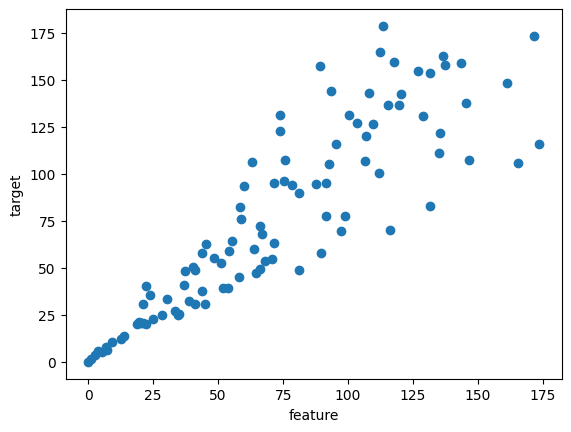

In [9]:
%matplotlib inline

# Creating random data with visible linear dependence in order to apply linear regression
feature = np.array([random.random()*i+i for i in range(100)])
target = np.array([random.random()*i+i for i in range(100)])
plt.scatter( feature, target )
plt.xlabel('feature')
plt.ylabel('target')

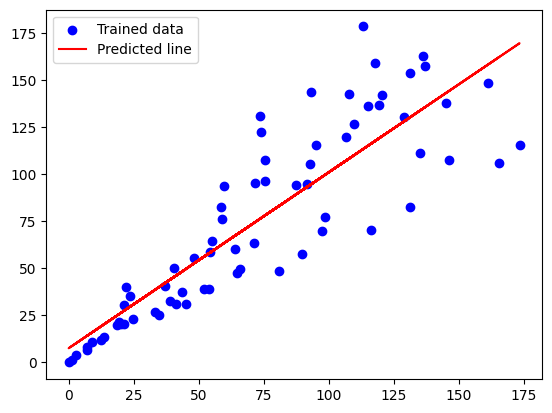

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( feature.reshape(-1, 1), target, train_size=0.7, random_state= 120 )

#The loss function is MSE for Linear regression, it will try to minimize it
model = linear_model.LinearRegression()
model.fit( X_train, y_train )
line = X_train * model.coef_ + model.intercept_ # line => y = k*x + b
plt.scatter( X_train, y_train, c = 'blue', label = 'Trained data' )
plt.plot( X_train, line, c = 'red', label = 'Predicted line' )
plt.legend()
plt.show()

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

#metrics
def metrics( model, X_test, y_test, y_pred ):
    mae = mean_absolute_error( y_test, y_pred )
    mse = mean_squared_error( y_test, y_pred )
    score = model.score( X_test, y_test )
    print( "MSE = {:.2f}, MAE = {:.2f}, Score_R2 = {:.2f}%".format(mae, mse, score*100))


y_pred = model.predict( X_test )
metrics( model, X_test, y_test, y_pred )

MSE = 15.32, MAE = 456.22, Score_R2 = 80.85%


In [12]:
# CV = cross-validating method,  Regularizer - method that helps to avoid overfitting
model_L1_LassoCV = linear_model.LassoCV( cv = 10 ).fit( X_train, y_train )
model_L2_RidgeCV = linear_model.RidgeCV( cv = 10 ).fit( X_train, y_train )
model_ElasticNetCV = linear_model.ElasticNetCV( cv = 10 ).fit( X_train, y_train ) # Combined L1, L2 as regularizer

y_pred_Lasso = model_L1_LassoCV.predict(X_test)
y_pred_Ridge = model_L2_RidgeCV.predict(X_test)
y_pred_ElasticNet = model_ElasticNetCV.predict(X_test)

metrics( model_L1_LassoCV, X_test, y_test, y_pred_Lasso )
metrics( model_L2_RidgeCV, X_test, y_test, y_pred_Ridge )
metrics( model_ElasticNetCV, X_test, y_test, y_pred_ElasticNet )

MSE = 15.55, MAE = 465.51, Score_R2 = 80.46%
MSE = 15.32, MAE = 456.26, Score_R2 = 80.85%
MSE = 15.58, MAE = 466.45, Score_R2 = 80.42%


Because I made predictions based on single parameter these regularizers and cross-validation methods are not much different from simple one, but it can be helpful if I have a lot of parameters.